# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [109]:
from scipy.stats import binom

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [110]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


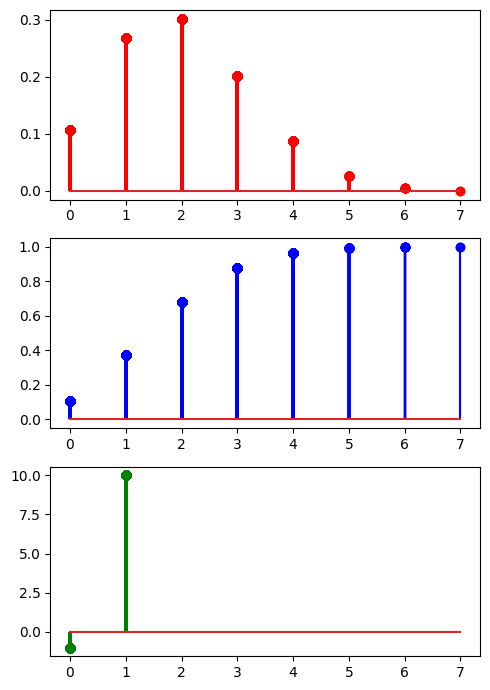

In [111]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

### Normal Distribution


In [112]:
from scipy.stats import norm

# Define all the probability functions related to this distribution

def dnorm(x, mu=0, sigma=1):
    """
    Calculates the density of the normal distribution (pdf is the similar to pmf but for continuous variables)
    """
    result = norm.pdf(x, loc=mu, scale=sigma)

    return result

def pnorm(x, mu=0, sigma=1):
    """
    Calculates the cumulative of the normal distribution
    """
    result = norm.cdf(x, loc=mu, scale=sigma)

    return result

def qnorm(x, mu=0, sigma=1):
    """
    Calculates the quantile function from the normal distribution
    """
    result = norm.ppf(x, loc=mu, scale=sigma)

    return result

def rnorm(x, mu=0, sigma=1):
    """
    Generates random variables from the normal distribution
    """
    result = norm.rvs(loc=mu, scale=sigma, size=x, random_state=42)

    return result

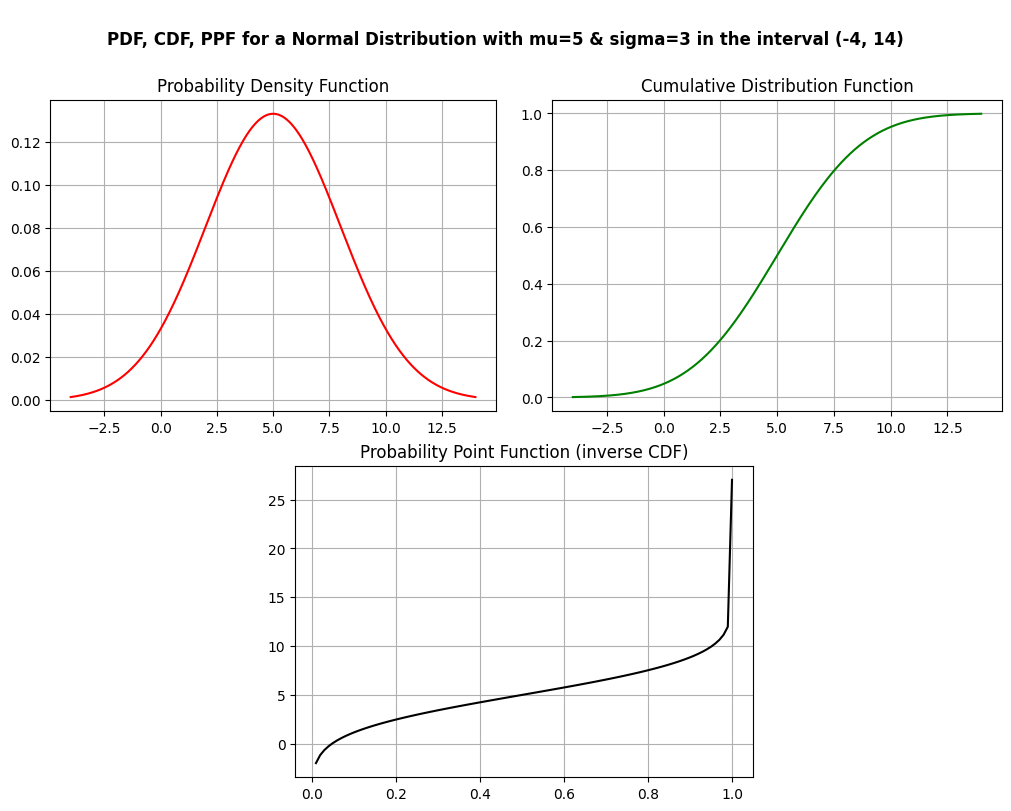

In [113]:
import matplotlib.pyplot as plt
import numpy as np


# Different mu and sigma change the scale of the normal distribution
mean, std = 5, 3

# 99% of the data lies within +- 3 std from the mean, thus:
lower_limit = mean - std * 3
upper_limit = mean + std * 3

data_norm = np.arange(lower_limit, upper_limit, 0.01)

pdf_norm = dnorm(data_norm, mu=mean, sigma=std)
cdf_norm = pnorm(data_norm, mu=mean, sigma=std)
ppf_norm = qnorm(data_norm, mu=mean, sigma=std)

fig = plt.figure(figsize=(10, 8), constrained_layout=True)
gs = fig.add_gridspec(2, 4) 

ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[1, 1:3])

ax1.plot(data_norm, pdf_norm, c='r'); ax1.set_title('Probability Density Function'); ax1.grid(True)
ax2.plot(data_norm, cdf_norm, c='g'); ax2.set_title('Cumulative Distribution Function'); ax2.grid(True)
ax3.plot(data_norm, ppf_norm, c='k'); ax3.set_title('Probability Point Function (inverse CDF)'); ax3.grid(True)

fig.suptitle(f'\nPDF, CDF, PPF for a Normal Distribution with mu={mean} & sigma={std} in the interval ({lower_limit}, {upper_limit})\n', 
             fontsize='large', fontweight='bold')

# Show the plot
plt.show()

### Normal Distribution Simulation

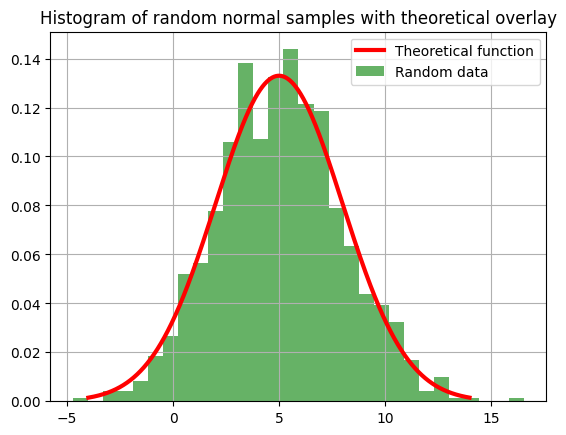

In [114]:
# Simulate 1000 samples
samples_norm = rnorm(1000, mu=mean, sigma=std)

# Density parameter scales height of bins as an approximation of PDF
plt.hist(samples_norm, bins=30, density=True, alpha=0.6, color='g')
plt.plot(data_norm, pdf_norm, color='r', lw=3) # Overlay the theoretical distribution
plt.legend(['Theoretical function', 'Random data'])
plt.title('Histogram of random normal samples with theoretical overlay')
plt.grid(True)
plt.show()

### Uniform Distribution

In [115]:
from scipy.stats import uniform
import numpy as np

# Define all the probability functions related to this distribution

def duniform(x, a=0, b=1):
    """
    Calculates the density of the uniform distribution 
    """
    result = uniform.pdf(x, loc=a, scale=b-a)

    return result

def puniform(x, a=0, b=1):
    """
    Calculates the cumulative of the uniform distribution
    """
    result = uniform.cdf(x, loc=a, scale=b-a)

    return result

def quniform(x, a=0, b=1):
    """
    Calculates the quantile function from the uniform distribution
    """
    result = uniform.ppf(q=x, loc=a, scale=b-a)

    return result

def runiform(x, a=0, b=1):
    """
    Generates random variables from the uniform distribution
    """
    result = uniform.rvs(loc=a, scale=b-a, size=x)

    return result

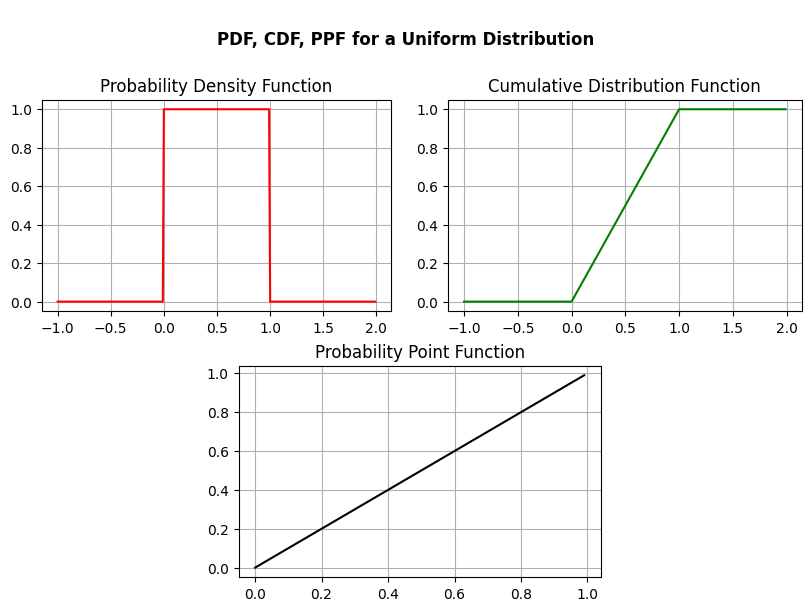

In [116]:
# Lower and upper bounds
a, b = 0, 1

data_unif = np.arange(-1, 2, 0.01)

pdf_unif = duniform(data_unif, a=a, b=b)
cdf_unif = puniform(data_unif, a=a, b=b)
ppf_unif = quniform(data_unif, a=a, b=b)

fig = plt.figure(figsize=(8, 6), constrained_layout=True)
gs = fig.add_gridspec(2, 4) 

ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[1, 1:3])

ax1.plot(data_unif, pdf_unif, c='r'); ax1.set_title('Probability Density Function'); ax1.grid(True)
ax2.plot(data_unif, cdf_unif, c='g'); ax2.set_title('Cumulative Distribution Function'); ax2.grid(True)
ax3.plot(data_unif, ppf_unif, c='k'); ax3.set_title('Probability Point Function'); ax3.grid(True)

fig.suptitle(f'\nPDF, CDF, PPF for a Uniform Distribution\n', 
             fontsize='large', fontweight='bold')

# Show the plot
plt.show()

### Uniform Distribution Simulation

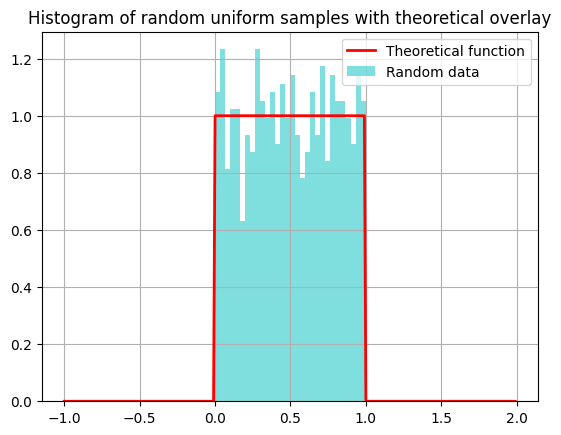

In [117]:
# Simulate 1000 samples
samples_unif = runiform(1000, a=a, b=b)

# Density parameter scales height of bins as an approximate PDF
plt.hist(samples_unif, bins=30, density=True, alpha=0.5, color='c')
plt.plot(data_unif, pdf_unif, color='r', lw=2)
plt.title("Histogram of random uniform samples with theoretical overlay")
plt.legend(['Theoretical function', 'Random data'])
plt.grid(True)
plt.show()